In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [2]:
df = pd.read_excel('original_540k.xlsx', encoding='utf-8')
df.head()

,category,date,stars,title,review,product,word_count
0,Electronics›Computers & Accessories›Networking...,"on January 1, 2017",5,Quadrupled my speed \xf0\x9f\x98\x80,Quadrupled my speed at home. There are 4 impor...,NetgearNighthawk,386
1,Electronics›Computers & Accessories›Networking...,"on February 22, 2018",5,The Router That Was Promised,"When I moved in with my wife, she brought with...",NetgearNighthawk,221
2,Electronics›Computers & Accessories›Networking...,"on March 5, 2018",3,Do not trust the specifications shown within t...,"In all honesty, this is certainly a capable ro...",NetgearNighthawk,309
3,Electronics›Computers & Accessories›Networking...,"on August 2, 2017",1,"This is the inferior R6700v2, NOT the R6700 Mo...","As others have stated, the Amazon listing is f...",NetgearNighthawk,195
4,Electronics›Computers & Accessories›Networking...,"on October 14, 2015",5,the router of today for the home OF THE FUTURE,"What\'s a ""tri-band"" router? In extremely rudi...",NetgearNighthawk,566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542558 entries, 0 to 27409
Data columns (total 7 columns):
category      542558 non-null object
date          542558 non-null object
stars         542558 non-null int64
title         542520 non-null object
review        542485 non-null object
product       542558 non-null object
word_count    542558 non-null int64
dtypes: int64(2), object(5)
memory usage: 33.1+ MB


In [4]:
#adding stars_size col
df['total_number_reviews'] = df.groupby('stars')['stars'].transform('size')
df.head()

,category,date,stars,title,review,product,word_count,total_number_reviews
0,Electronics›Computers & Accessories›Networking...,"on January 1, 2017",5,Quadrupled my speed \xf0\x9f\x98\x80,Quadrupled my speed at home. There are 4 impor...,NetgearNighthawk,386,373292
1,Electronics›Computers & Accessories›Networking...,"on February 22, 2018",5,The Router That Was Promised,"When I moved in with my wife, she brought with...",NetgearNighthawk,221,373292
2,Electronics›Computers & Accessories›Networking...,"on March 5, 2018",3,Do not trust the specifications shown within t...,"In all honesty, this is certainly a capable ro...",NetgearNighthawk,309,35351
3,Electronics›Computers & Accessories›Networking...,"on August 2, 2017",1,"This is the inferior R6700v2, NOT the R6700 Mo...","As others have stated, the Amazon listing is f...",NetgearNighthawk,195,40245
4,Electronics›Computers & Accessories›Networking...,"on October 14, 2015",5,the router of today for the home OF THE FUTURE,"What\'s a ""tri-band"" router? In extremely rudi...",NetgearNighthawk,566,373292


In [5]:
#understanding the total quantaty of diferent products
df4= df.copy()
#df4 = df4[['product']]
df4.set_index('product', inplace=True) 
df4['total_reviews'] = df.groupby(['product'], sort=False)['review'].count()
df4.reset_index(inplace=True) 
df4.head()
#df_rank = df.groupby('rank')

,product,category,date,stars,title,review,word_count,total_number_reviews,total_reviews
0,NetgearNighthawk,Electronics›Computers & Accessories›Networking...,"on January 1, 2017",5,Quadrupled my speed \xf0\x9f\x98\x80,Quadrupled my speed at home. There are 4 impor...,386,373292,21288
1,NetgearNighthawk,Electronics›Computers & Accessories›Networking...,"on February 22, 2018",5,The Router That Was Promised,"When I moved in with my wife, she brought with...",221,373292,21288
2,NetgearNighthawk,Electronics›Computers & Accessories›Networking...,"on March 5, 2018",3,Do not trust the specifications shown within t...,"In all honesty, this is certainly a capable ro...",309,35351,21288
3,NetgearNighthawk,Electronics›Computers & Accessories›Networking...,"on August 2, 2017",1,"This is the inferior R6700v2, NOT the R6700 Mo...","As others have stated, the Amazon listing is f...",195,40245,21288
4,NetgearNighthawk,Electronics›Computers & Accessories›Networking...,"on October 14, 2015",5,the router of today for the home OF THE FUTURE,"What\'s a ""tri-band"" router? In extremely rudi...",566,373292,21288


In [6]:
#understanding the total nr of diferent products
df5= df4.copy()
#df4 = df4[['product']]
df5 = df5.drop_duplicates(subset=['product'], keep='first')
df5.head(10)

,product,category,date,stars,title,review,word_count,total_number_reviews,total_reviews
0,NetgearNighthawk,Electronics›Computers & Accessories›Networking...,"on January 1, 2017",5,Quadrupled my speed \xf0\x9f\x98\x80,Quadrupled my speed at home. There are 4 impor...,386,373292,21288
21290,netGearExtender,Electronics›Computers & Accessories›Networking...,"on February 8, 2017",5,Works Great and with Easy Set-Up.,"Great extension of my wireless. I have a"" man ...",237,373292,29800
51090,kindlePaperWhite,Amazon product,"on May 29, 2017",5,Honest Kindle Review,"Let me guess: you love books, but you\'re not ...",533,373292,65317
116418,instantPot,Home & Kitchen›Kitchen & Dining›Small Applianc...,"on December 12, 2016",5,WHY and WHO should buy it?? 6 months UPDATE.,Instant pot aaah .. Finally I have it. I have ...,935,373292,28075
144498,fireStick,Amazon product,"on July 29, 2018",5,What\xe2\x80\x99s there not to like?? The futu...,What can I say?? Amazon is taking over! I just...,440,373292,165782
310298,fire10Tablet,Amazon product,"on October 14, 2017",5,Excellent unit,I upgraded from a generation 5 with ads to thi...,184,373292,25089
335388,fire7tablet,Amazon product,"on June 9, 2017",4,Amazon\'s two Bargain Fire Tablets \xe2\x80\x9...,Amazon has just updated their bargain priced ...,1690,71151,39660
375058,echoShow,Amazon product,"on July 26, 2017",5,Thank You Amazon! and my 95yr Mom Thanks you! ...,I know that many media folks have stated that ...,566,373292,16037
391098,echoDot,Amazon product,"on December 1, 2016",5,A new companion for my Brother With MS,My brother Robert who has been bed ridden and ...,64,373292,119069
510188,echo_2_generation,Amazon product,"on March 1, 2018",5,Remember GEN 2 is an updated version of the or...,Let me preface this review by revealing a few ...,603,373292,32368


In [7]:
#new table for better visualization
df5.head()
df6 = df5[['product','total_reviews']]
df6.reset_index(drop=True, inplace=True)
#df6.drop_index(inplace=True)
#df1 = df.iloc[:,0:2] 
df6.head(10)

,product,total_reviews
0,NetgearNighthawk,21288
1,netGearExtender,29800
2,kindlePaperWhite,65317
3,instantPot,28075
4,fireStick,165782
5,fire10Tablet,25089
6,fire7tablet,39660
7,echoShow,16037
8,echoDot,119069
9,echo_2_generation,32368


C:\Users\NB24634\AppData\Local\Continuum\miniconda3\envs\master_thesis\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\NB24634\AppData\Local\Continuum\miniconda3\envs\master_thesis\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


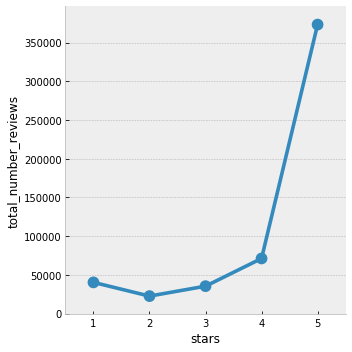

In [8]:
#number of reviews per stars
#tips = pd.read_excel('original_540k.xlsx', encoding='utf-8')
ax = sns.factorplot(x="stars", y="total_number_reviews", data=df)

In [9]:
#numberofreviews by stars
df2 = df.copy()
df2 = df2[['stars','total_number_reviews']]
df2.drop_duplicates(keep='first', inplace=True)
df2.reset_index(inplace=True)
df2.sort_values(by='stars', ascending=True, inplace=True)
del df2['index']
df2.head()

,stars,total_number_reviews
2,1,40245
3,2,22519
1,3,35351
4,4,71151
0,5,373292


In [15]:
df2.reset_index(drop=True, inplace=True)
df2.head()

,stars,total_number_reviews
0,1,40245
1,2,22519
2,3,35351
3,4,71151
4,5,373292


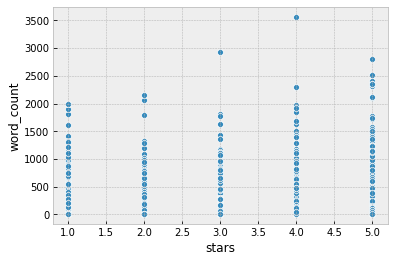

In [14]:
#number of words per stars
tips = pd.read_excel('original_540k.xlsx', encoding='utf-8')
ax = sns.scatterplot(x="stars", y="word_count", data=tips)